In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
%matplotlib inline

In [2]:
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )

sms_raw = pd.read_csv(data_path, delimiter = '\t', header = None)
sms_raw.columns = ['spam', 'message']
sms_raw.head(20)

spam                                            message
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...
5   spam  FreeMsg Hey there darling it's been 3 week's n...
6    ham  Even my brother is not like to speak with me. ...
7    ham  As per your request 'Melle Melle (Oru Minnamin...
8   spam  WINNER!! As a valued network customer you have...
9   spam  Had your mobile 11 months or more? U R entitle...
10   ham  I'm gonna be home soon and i don't want to tal...
11  spam  SIX chances to win CASH! From 100 to 20,000 po...
12  spam  URGENT! You have won a 1 week FREE membership ...
13   ham  I've been searching for the right words to tha...
14   ham                I HAVE A DATE ON SUNDAY WITH WILL!!
15  spam  XXXMobileMovieClub: To use your credit, click ...
16   ham                         Oh k...i'm watching here:)
17   ham  Eh u remember how 2 spell his name... Yes i di...
18   ham  Fine if thats the way u feel. Thats the way ...
19  spam  England v Macedonia - dont miss the goals/team...

In [4]:
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [5]:
sms_raw['allcaps'] = sms_raw.message.str.isupper()

In [6]:
print (df.head())

NameError: name 'df' is not defined

In [7]:
sms_raw['spam'] = (sms_raw['spam'] == 'spam')

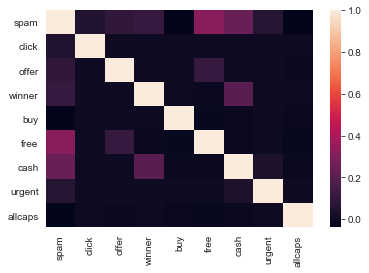

In [8]:
sns.set_style('white')
sns.heatmap(sms_raw.corr())

In [9]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

In [10]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 604


In [11]:
print(data.shape[0])

5572


In [12]:
print(((1-(target != y_pred).sum()/data.shape[0]))*100)

89.16008614501077


In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[4770,   55],
       [ 549,  198]], dtype=int64)

In [14]:
print ((target!=y_pred).sum())

604


In [15]:
print(4770+549+198+55)

5572


In [17]:
False_neg = 0
True_spam = 0
True_ham = 0
False_pos = 0


if each in sms_raw.click == False or each in sms_raw.offer == False or each in sms_raw.winner == False or each in sms_raw.buy == False or each in sms_raw.free == False or each in sms_raw.cash == False or each in sms_raw.urgent == False or each in sms_raw.allcaps == False and each in sms_raw.spam == 'spam':
        False_neg = False_neg + 1
print (False_neg)
        

NameError: name 'each' is not defined

In [18]:
#manual calculation of confusion matrix
False_neg = 0

for key in keywords:
    for each in sms_raw[str(key)]:
        for every in sms_raw['spam']:
            if each == False and every == 'spam':
                False_neg = False_neg + 1
#code is currently not looking at each ROW but looking at everything I think.              
        
print (False_neg)


0


In [ ]:
  elif sms_raw.click == True or sms_raw.offer == True or sms_raw.winner == True or sms_raw.buy == True or sms_raw.free == True or sms_raw.cash == True or sms_raw.urgent == True or sms_raw.allcaps == True and sms_raw.spam == 'spam':
        True_spam = True_spam + 1
    elif sms_raw.click == False or sms_raw.offer == False or sms_raw.winner == False or sms_raw.buy == False or sms_raw.free == False or sms_raw.cash == False or sms_raw.urgent == False or sms_raw.allcaps == False and sms_raw.spam == 'ham':
        True_ham = True_ham + 1
    elif sms_raw.click == True or sms_raw.offer == True or sms_raw.winner == True or sms_raw.buy == True or sms_raw.free == True or sms_raw.cash == True or sms_raw.urgent == True or sms_raw.allcaps == True and sms_raw.spam == 'ham':
        False_pos = False_pos + 1
        

In [63]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.884304932735426
Testing on Sample: 0.8916008614501076


In [64]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.89784946, 0.89426523, 0.89426523, 0.890681  , 0.89605735,
       0.89048474, 0.88150808, 0.89028777, 0.88489209, 0.89568345])